In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('data/spaceship_titanic.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Initial notes:

- The 'PassengerId' and 'Name' columns seems unnecessary and can be dropped.
- All predictors seem to have missing values.

In [4]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Notes:

- Outlier values seem very likely.

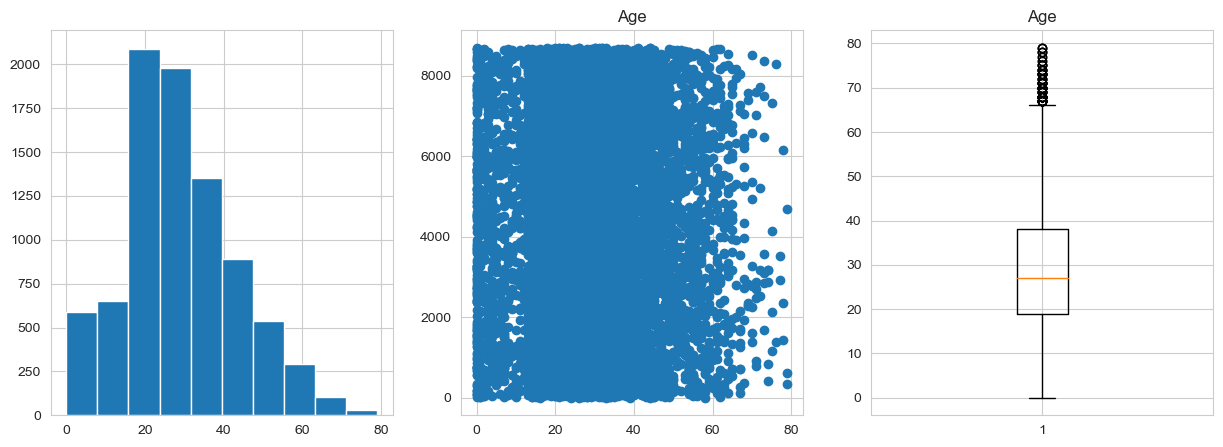

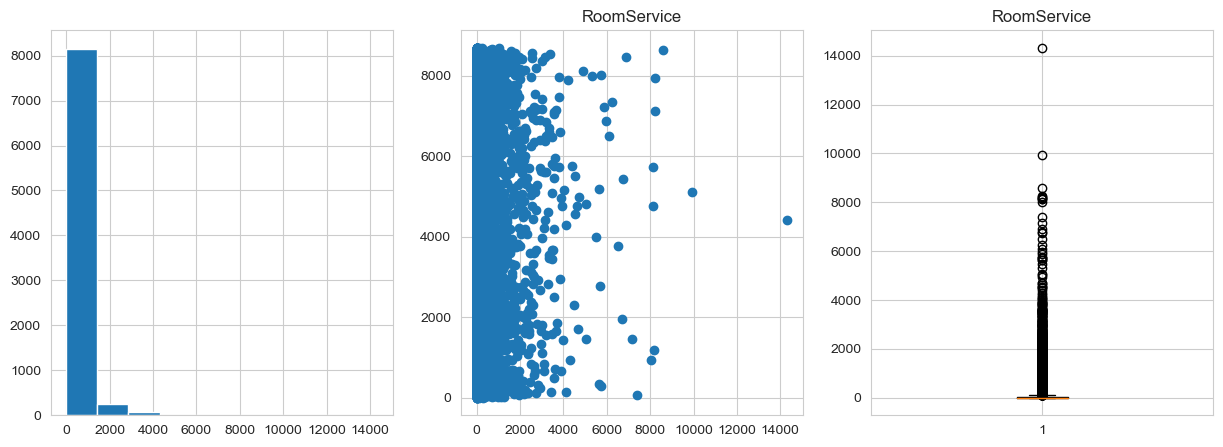

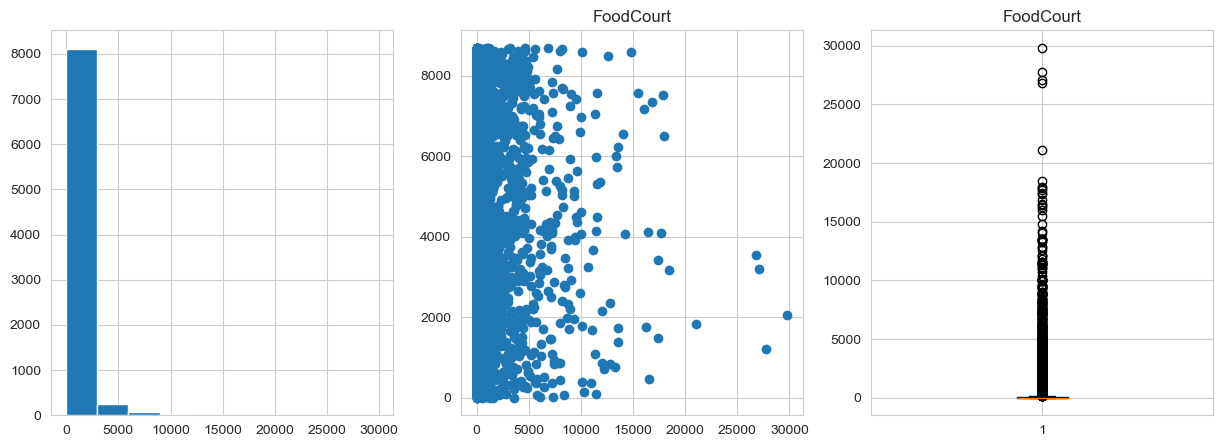

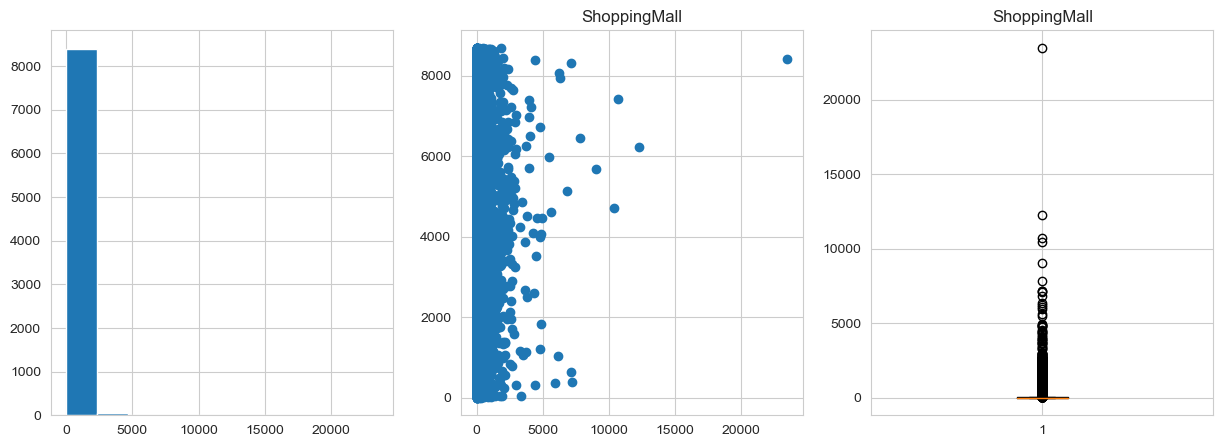

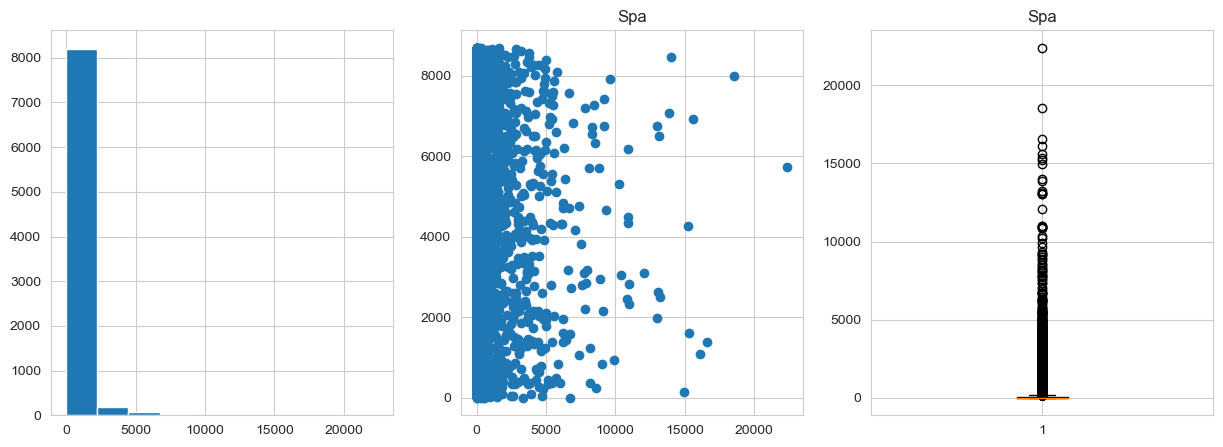

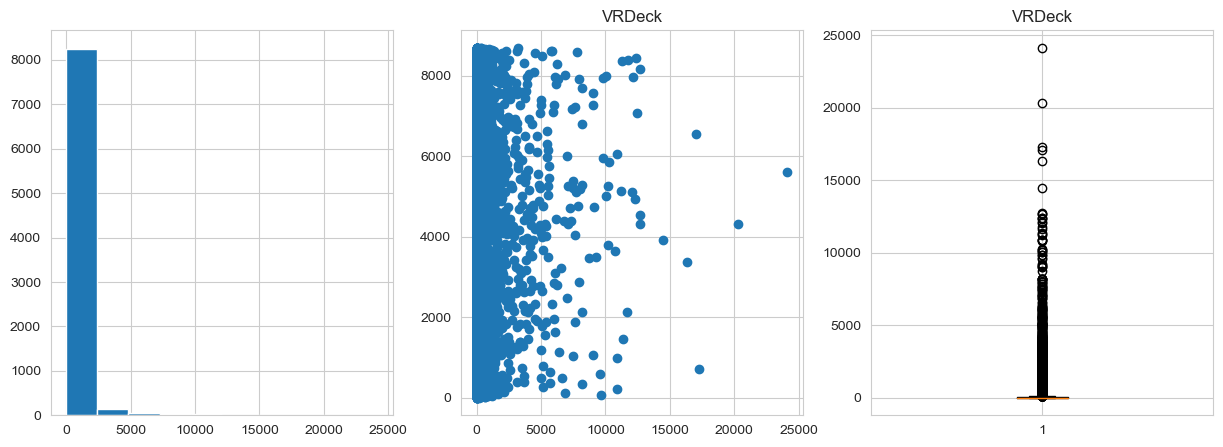

In [47]:
for num_col in df.select_dtypes(include=[np.float64]):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax.flat[0].hist(df[num_col])
    ax.flat[1].scatter(df[num_col], df.index)
    ax.flat[2].boxplot(df[~df[num_col].isnull()][num_col].to_list())
    for id in range(1, 3):
        ax.flat[id].set_title(f'{num_col}')
    plt.show()

Notes:

- There are outliers which should be removed.

In [51]:
numeric_df = df.select_dtypes(include=[np.float64])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
((numeric_df > (Q3 + 1.5 * IQR))).sum()

Age               77
RoomService     1861
FoodCourt       1823
ShoppingMall    1829
Spa             1788
VRDeck          1809
dtype: int64

Notes:

- Removing based on the IQR will remove too many entries. Instead, let's remove them manually.

In [63]:
df = df[
    (df['RoomService'] < 9_000) & 
    (df['FoodCourt'] < 20_000) &
    (df['ShoppingMall'] < 8_000) &
    (df['Spa'] < 15_000) &
    (df['VRDeck'] < 14_000)
]  

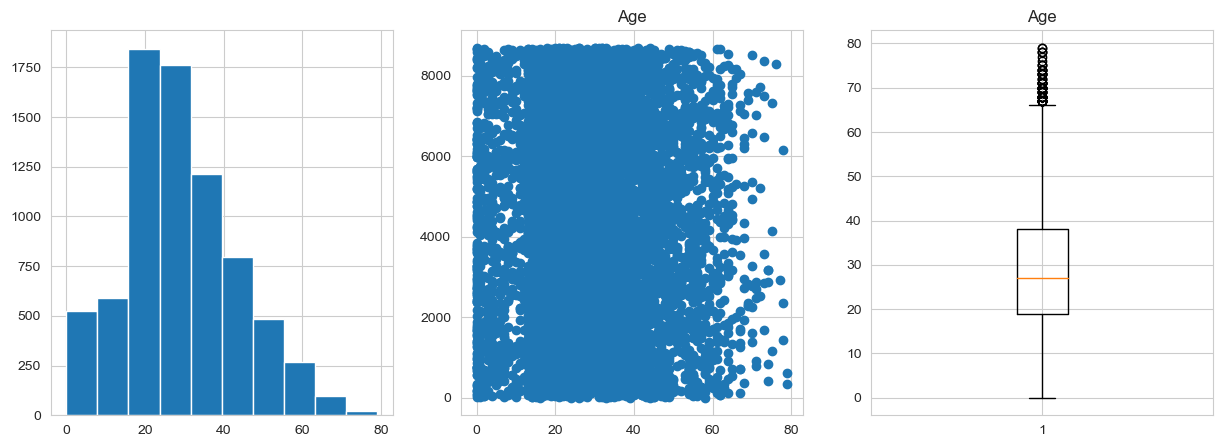

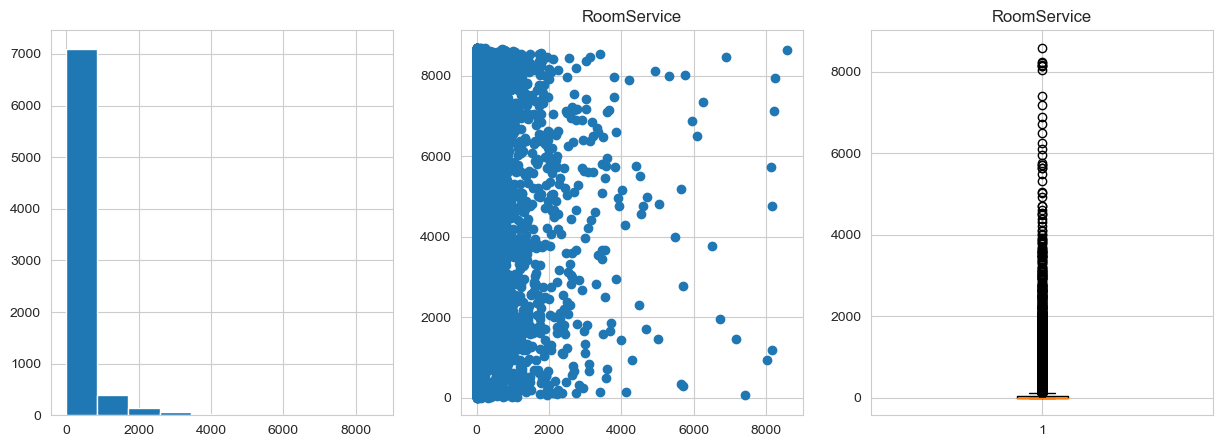

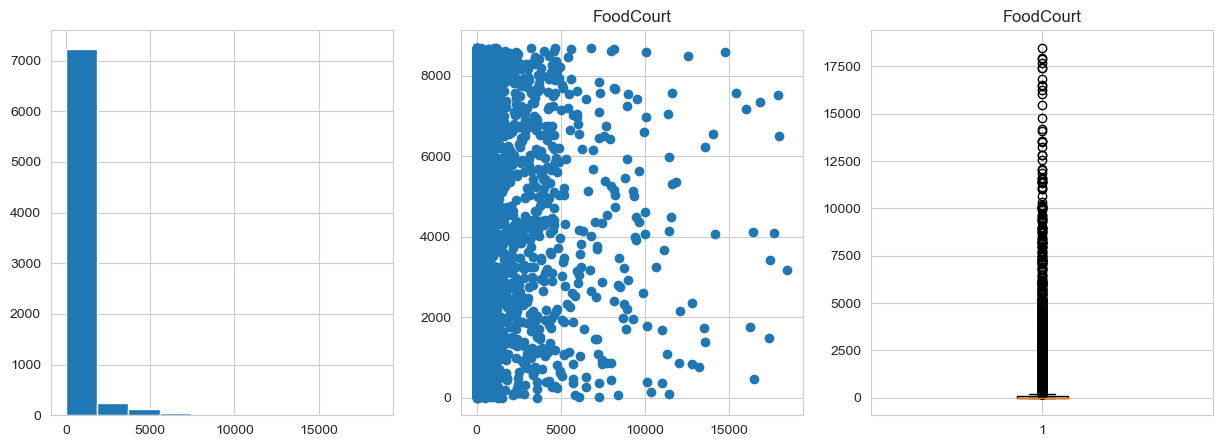

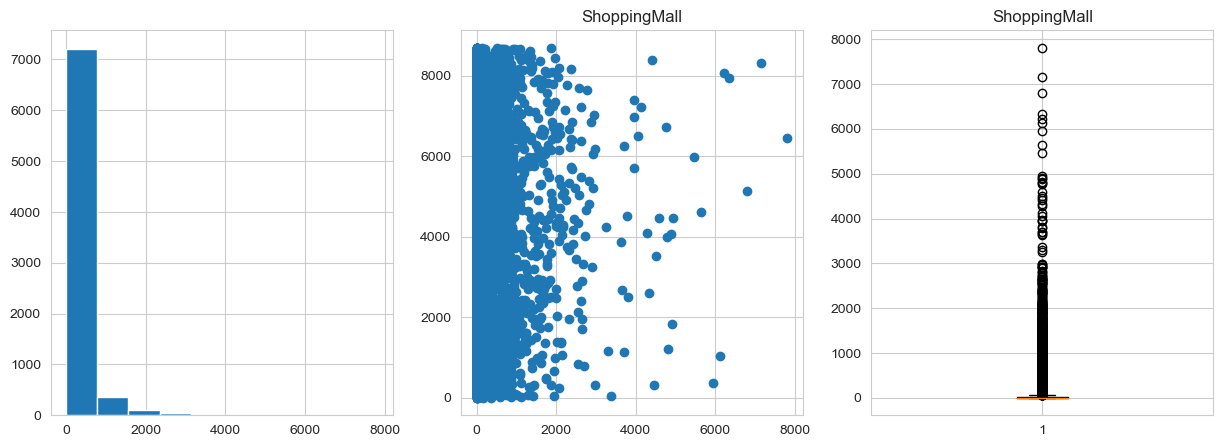

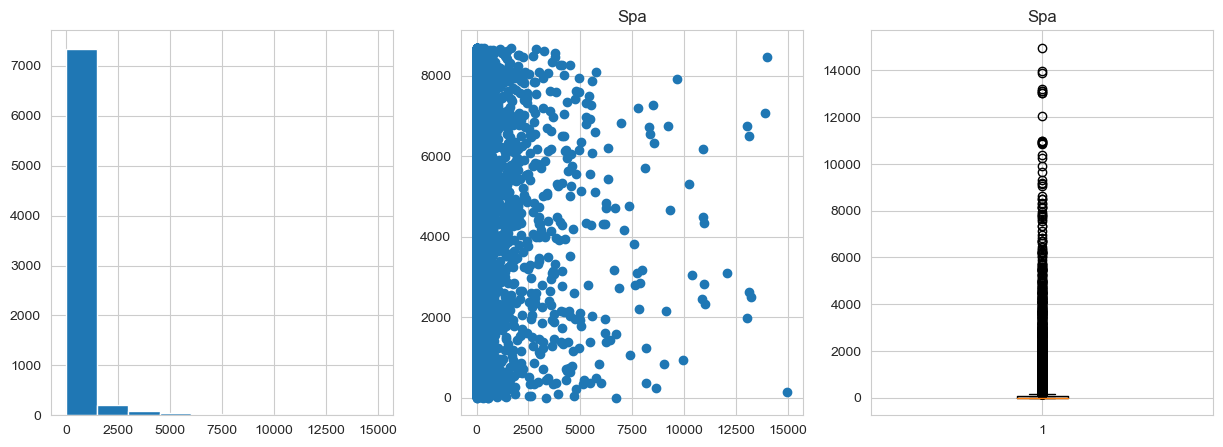

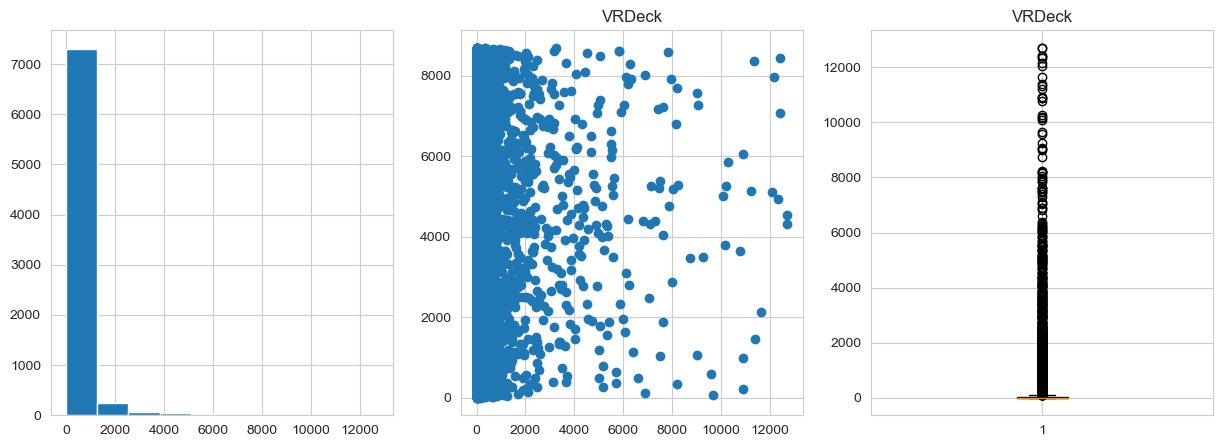

In [64]:
for num_col in df.select_dtypes(include=[np.float64]):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax.flat[0].hist(df[num_col])
    ax.flat[1].scatter(df[num_col], df.index)
    ax.flat[2].boxplot(df[~df[num_col].isnull()][num_col].to_list())
    for id in range(1, 3):
        ax.flat[id].set_title(f'{num_col}')
    plt.show()

In [68]:
for num_col in df.select_dtypes(include=[np.float64]):
    print(f'{num_col}: {len(df[df[num_col].isnull()])} NaNs')

Age: 165 NaNs
RoomService: 0 NaNs
FoodCourt: 0 NaNs
ShoppingMall: 0 NaNs
Spa: 0 NaNs
VRDeck: 0 NaNs


Notes:

- Filling NaN values with samples from the distribution of the 'Age' column to preserve the variance of the data.

In [69]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()
df.loc[df['Age'].isnull(), 'Age'] = np.random.normal(mean_age, std_age, df['Age'].isnull().sum())